# Import

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *


In [4]:
%load_ext autoreload
%autoreload 2

# Dataset

In [5]:
folder=Dataset(base_directory='/Users/savare/DeepLearning/',dataset='eeg')

Reading data from /Users/savare/DeepLearning/EEG//
Reading data from /Users/savare/DeepLearning/EEG//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//data//
Reading data from /Users/savare/DeepLearning/EEG//stefano//
Reading data from /Users/savare/DeepLearning/EEG//stefano//__pycache__//
Reading data from /Users/savare/DeepLearning/EEG//stefano//notebook//
Reading data from /Users/savare/DeepLearning/EEG//stored//


In [7]:
single_layer=read_pickle(folder.stored.file('single'))
three_layers=read_pickle(folder.stored.file('three'))

# Plot

In [8]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [20]:
def get_performance(results):
    performance_train=[]
    performance_validation=[]
    for result in results:
        result.compute_errors()
        performance_train.append(result._experiments[-1].performance_train)
        performance_validation.append(result._experiments[-1].performance_validation)
        
    return performance_train,performance_validation

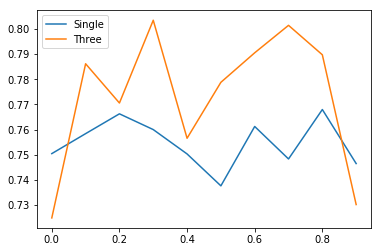

In [24]:
errors_train,errors_validation=get_performance(single_layer)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_validation,label='Single')

errors_train,errors_validation=get_performance(three_layers)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_validation,label='Three')

plt.legend()

plt.show()